## Building a Bollinger Bands and RSI Trading Strategy 

#### Description: This program uses the Bollinger Bands and RSI to determine when to buy and sell stock

In [5]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
# Define a function to create and get the Bollinger Bands
def bollinger_bands(data, window_size=30):
    rolling_mean = data['Close'].rolling(window=window_size).mean()  # Simple Moving Average (SMA)
    rolling_std = data['Close'].rolling(window=window_size).std() 
    data['UpperBand'] = rolling_mean + (2*rolling_std)
    data['LowerBand'] = rolling_mean - (2*rolling_std)
    return data

In [3]:
# Define a function to create and get the Relative Strength Index (RSI)
def RSI(data, window=13):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    RS = avg_gain / avg_loss
    RSI = 100 - (100 / (1 + RS))
    data['RSI'] = RSI
    data['Overbought'] = 70
    data['Oversold'] = 30
    return data

In [4]:
# Define a function to create and get the trading strategy
# Buy when the close price goes below the Lower Band and the RSI is less than 30 and I currently do not have a position
# Sell when the close price goes above the Upper Band and the RSI is greater than 60 and I currently have a position
def strategy(data):
    position = 0
    buy_price = []
    sell_price = []
    for i in range(len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
            position = 1
            buy_price.append(data['Close'][i])
            sell_price.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
            position = 0
            sell_price.append(data['Close'][i])
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
    return (buy_price, sell_price)

In [8]:
# Get the stock data
data = yf.download('AAPL', start='2018-03-07', end='2023-03-08')
# Show the data
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-07,43.735001,43.962502,43.567501,43.757500,41.389362,126814000
2018-03-08,43.869999,44.279999,43.767502,44.235001,41.841019,95096400
2018-03-09,44.490002,45.000000,44.347500,44.994999,42.559868,128740800
2018-03-12,45.072498,45.597500,45.052502,45.430000,42.971336,128828400
2018-03-13,45.647499,45.875000,44.810001,44.992500,42.557514,126774000
...,...,...,...,...,...,...
2023-03-01,146.830002,147.229996,145.009995,145.309998,144.175842,55479000
2023-03-02,144.380005,146.710007,143.899994,145.910004,144.771149,52238100
2023-03-03,148.039993,151.110001,147.330002,151.029999,149.851181,70732300


In [9]:
# Add the Bollinger Bands to the dataset
data = bollinger_bands(data)
data

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand
Date,,,,,,,,
2018-03-07,43.735001,43.962502,43.567501,43.757500,41.389362,126814000,NaN,NaN
2018-03-08,43.869999,44.279999,43.767502,44.235001,41.841019,95096400,NaN,NaN
2018-03-09,44.490002,45.000000,44.347500,44.994999,42.559868,128740800,NaN,NaN
2018-03-12,45.072498,45.597500,45.052502,45.430000,42.971336,128828400,NaN,NaN
2018-03-13,45.647499,45.875000,44.810001,44.992500,42.557514,126774000,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-03-01,146.830002,147.229996,145.009995,145.309998,144.175842,55479000,158.775328,136.207338
2023-03-02,144.380005,146.710007,143.899994,145.910004,144.771149,52238100,158.160264,137.535735
2023-03-03,148.039993,151.110001,147.330002,151.029999,149.851181,70732300,157.580715,139.165950


In [10]:
# Add the RSI to the dataset
data = RSI(data)
data

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold
Date,,,,,,,,,,,
2018-03-07,43.735001,43.962502,43.567501,43.757500,41.389362,126814000,NaN,NaN,NaN,70,30
2018-03-08,43.869999,44.279999,43.767502,44.235001,41.841019,95096400,NaN,NaN,NaN,70,30
2018-03-09,44.490002,45.000000,44.347500,44.994999,42.559868,128740800,NaN,NaN,NaN,70,30
2018-03-12,45.072498,45.597500,45.052502,45.430000,42.971336,128828400,NaN,NaN,NaN,70,30
2018-03-13,45.647499,45.875000,44.810001,44.992500,42.557514,126774000,NaN,NaN,NaN,70,30
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,146.830002,147.229996,145.009995,145.309998,144.175842,55479000,158.775328,136.207338,-130.215983,70,30
2023-03-02,144.380005,146.710007,143.899994,145.910004,144.771149,52238100,158.160264,137.535735,-150.980903,70,30
2023-03-03,148.039993,151.110001,147.330002,151.029999,149.851181,70732300,157.580715,139.165950,-353.899639,70,30


In [11]:
# Implement the trading strategy
buy_price, sell_price = strategy(data)
data['Buy'] = buy_price
data['Sell'] = sell_price

/tmp/ipykernel_6160/2045847793.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
/tmp/ipykernel_6160/2045847793.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
/tmp/ipykernel_6160/2045847793.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

In [12]:
data

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold,Buy,Sell
Date,,,,,,,,,,,,,
2018-03-07,43.735001,43.962502,43.567501,43.757500,41.389362,126814000,NaN,NaN,NaN,70,30,NaN,NaN
2018-03-08,43.869999,44.279999,43.767502,44.235001,41.841019,95096400,NaN,NaN,NaN,70,30,NaN,NaN
2018-03-09,44.490002,45.000000,44.347500,44.994999,42.559868,128740800,NaN,NaN,NaN,70,30,NaN,NaN
2018-03-12,45.072498,45.597500,45.052502,45.430000,42.971336,128828400,NaN,NaN,NaN,70,30,NaN,NaN
2018-03-13,45.647499,45.875000,44.810001,44.992500,42.557514,126774000,NaN,NaN,NaN,70,30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,146.830002,147.229996,145.009995,145.309998,144.175842,55479000,158.775328,136.207338,-130.215983,70,30,NaN,NaN
2023-03-02,144.380005,146.710007,143.899994,145.910004,144.771149,52238100,158.160264,137.535735,-150.980903,70,30,NaN,NaN
2023-03-03,148.039993,151.110001,147.330002,151.029999,149.851181,70732300,157.580715,139.165950,-353.899639,70,30,NaN,NaN


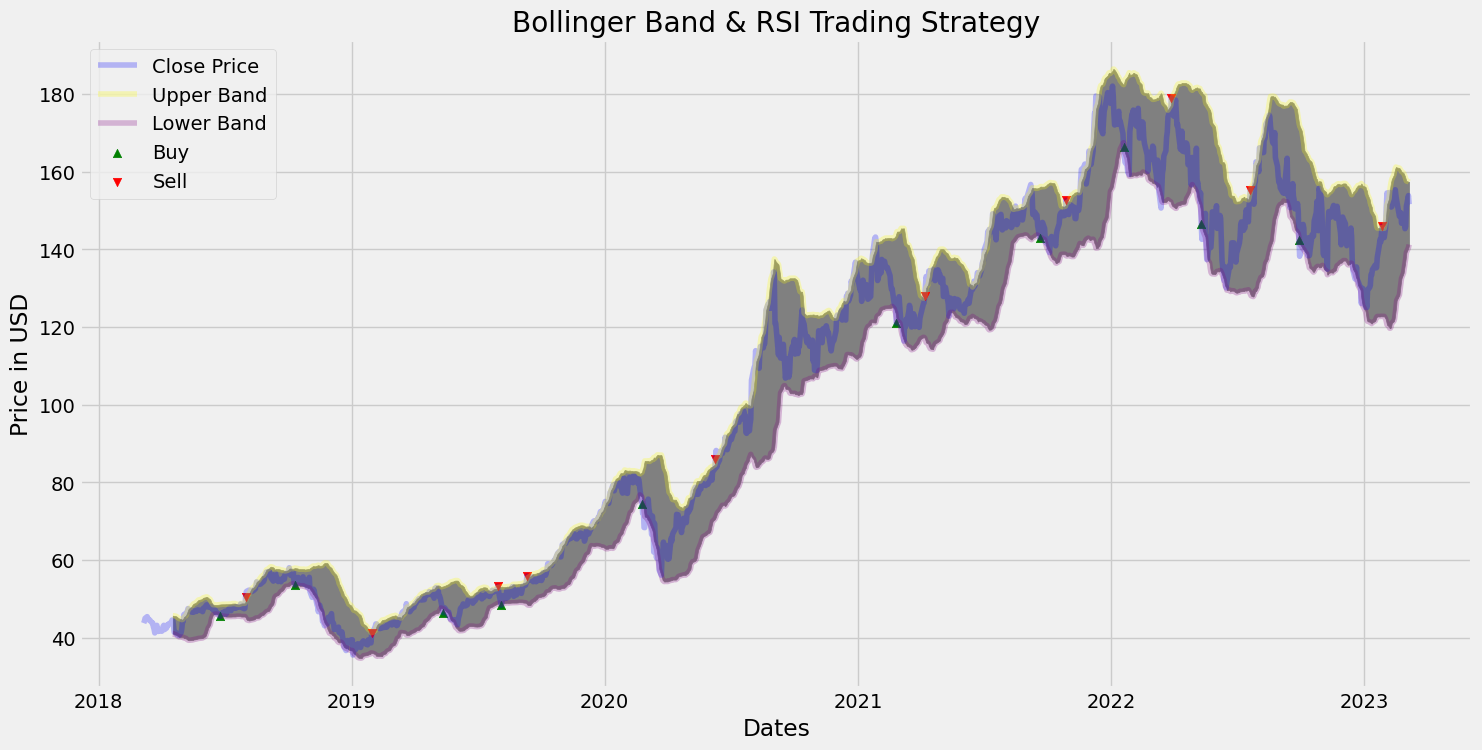

In [13]:
# Plot the Close Price, Bollinger Bands and the trading signals (Buy and Sell signals)
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Bollinger Band & RSI Trading Strategy')
plt.ylabel('Price in USD')
plt.xlabel('Dates')
ax.plot(data['Close'], label='Close Price', alpha=0.25, color='blue')
ax.plot(data['UpperBand'], label='Upper Band', alpha=0.25, color='yellow')
ax.plot(data['LowerBand'], label='Lower Band', alpha=0.25, color='purple')
ax.fill_between(data.index, data['UpperBand'], data['LowerBand'], color='grey')
ax.scatter(data.index, data['Buy'], label='Buy', alpha=1, marker='^', color='green')
ax.scatter(data.index, data['Sell'], label='Sell', alpha=1, marker='v', color='red')
plt.legend()
plt.show()